In [110]:
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [5]:
# set number of columns to displa
pd.set_option('display.max_columns', 100)

In [6]:
# read in data, in this case the 10 second summarised version
df = pd.read_excel('D:\GitHub\MSc-Project-March\SWaT_DataSWaT_2015_12_22_10sec.xlsx', engine="openpyxl")

In [7]:
df.shape

(49500, 41)

In [8]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P203,P205,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P402,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
0,2015-12-22 16:30:00,0.0,123.97593,1.0,1.0,251.9226,8.313061,312.79160,0.0,1.0,1.0,1.0,2.560983,0.000256,138.67438,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.23870,0.0,134.12332,1,1.0,7.446360,175.40632,260.7024,123.31450,0.001538,0.001409,0.001664,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0
1,2015-12-22 16:30:10,0.0,124.40769,1.0,1.0,251.9226,8.308960,312.90185,0.0,1.0,1.0,1.0,2.560983,0.000256,137.83724,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.23870,0.0,132.92363,1,1.0,7.444694,175.39090,260.7024,123.31450,0.001538,0.001409,0.001664,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0
2,2015-12-22 16:30:20,0.0,123.90527,1.0,1.0,251.9226,8.310979,312.80442,0.0,1.0,1.0,1.0,2.560983,0.000256,137.49280,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.23870,0.0,133.60803,1,1.0,7.445623,175.39090,260.7024,123.41448,0.001538,0.001409,0.001664,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0
3,2015-12-22 16:30:30,0.0,123.90134,1.0,1.0,251.9226,8.312612,312.91980,0.0,1.0,1.0,1.0,2.560983,0.000256,137.86928,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.31300,0.0,133.33120,1,1.0,7.444758,175.39090,260.7024,123.37989,0.001538,0.001409,0.001664,0.0,1.0,9.037747,0.0,3.3485,0.000256,1.0
4,2015-12-22 16:30:40,0.0,124.85909,1.0,1.0,251.9226,8.308191,313.00950,0.0,1.0,1.0,1.0,2.560983,0.000256,137.92537,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.27968,0.0,132.49679,1,1.0,7.444053,175.39090,260.7024,123.45296,0.001538,0.001409,0.001664,0.0,1.0,9.068188,0.0,3.3485,0.000256,1.0


In [9]:
df['Timestamp'].dtype

dtype('<M8[ns]')

In [10]:
df.index.name
# check for duplicates
#df.loc[df.duplicated()]

## Individual  Component Analysis

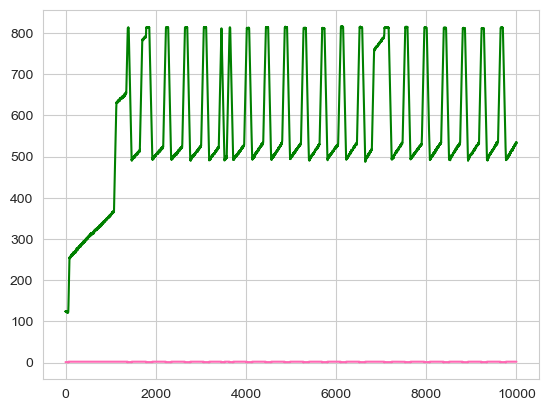

In [42]:
plt.plot(df.MV101.iloc[:10000], c = 'hotpink')
plt.plot(df.LIT101.iloc[:10000], c = 'green')
plt.show()


In [11]:
max_value = df['LIT101'].max()
min_value = df['LIT101'].min()
mean_value = df['LIT101'].mean()
std_value = df['LIT101'].std()
print(f'Max:{max_value}, Min:{min_value}, Mean:{mean_value}, , STD:{std_value}')

Max:817.28166, Min:121.05551, Mean:587.5327728597944, , STD:121.66377809843156


In [12]:
col = df['LIT101']

In [13]:
col.name

'LIT101'

In [22]:
#make_delta_column(df.FIT101)

In [65]:

def get_features(col = pd.Series) -> list:
    '''
    returns list of values which describe the component/ column

    :param col:
    Takes a pd.Seires which is all the values for the component ove the time period
    :return:
    Name of the component
    Max, Min, Mean and STD for the component
    Delta which is the Mean of change in value for each time step
    '''
    name = col.name
    max_value = col.max()
    min_value = col.min()
    mean_value = col.mean()
    std_value = col.std()

    #print(f'Max:{max_value}, Min:{min_value}, Mean:{mean_value}, , STD:{std_value}')

    #return [name, max_value, min_value, mean_value, std_value]
    return pd.Series([ max_value, min_value, mean_value, std_value],
                 index=['Max', 'Min', 'Mean', 'STD'])

# make df without time stamp
df_for_features = df.loc[:, ~df.columns.isin(['Timestamp'])]

# get features for all columns
# Apply the get_features function to each column using apply
component_features = pd.DataFrame()
component_features = df_for_features.apply(get_features).transpose()


In [66]:
#feature_list = get_features(df['LIT101'])
#feature_list

In [67]:
component_features.head(40)

,Max,Min,Mean,STD
FIT101,2.682862,0.000000,1.850517,1.130677
LIT101,817.281660,121.055510,587.532773,121.663778
MV101,2.000000,0.100000,1.720564,0.453235
P101,2.000000,1.000000,1.749149,0.432605
AIT201,271.930280,251.755940,263.783544,4.786958
AIT202,8.987344,8.259677,8.388162,0.090164
AIT203,567.334050,312.278900,348.379334,49.449694
FIT201,2.486669,0.000000,1.834095,1.058171
MV201,2.000000,0.200000,1.746497,0.438908
P203,2.000000,1.000000,1.747244,0.433711


In [68]:
component_features.shape

(40, 4)

<Axes: >

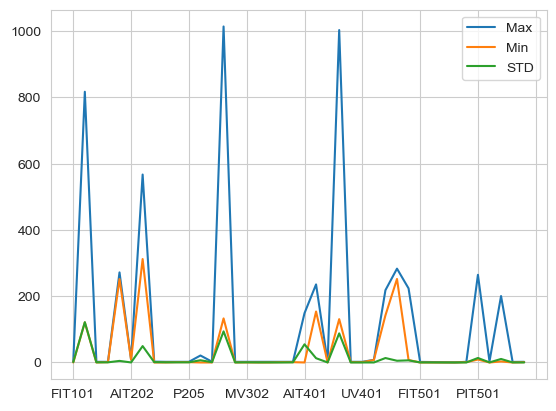

In [69]:
component_features[['Max', 'Min', 'STD']].plot()

## Cluster Components
 The task involves using the (cluster) which facilitates a visual representation. This allows users to observe patterns and trends
which would be lost when interrogating the raw datasets

In [136]:
K = range(1,11)
inertia = []

for k in K:
    # Cluster the components by their features
    kmeans = KMeans(n_clusters=k, random_state=44)
    kmeans.fit(component_features)
    inertia.append(kmeans.inertia_)

#component_features['Cluster'] = kmeans.fit_predict(component_features)

C:\Users\loz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\loz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\loz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\loz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

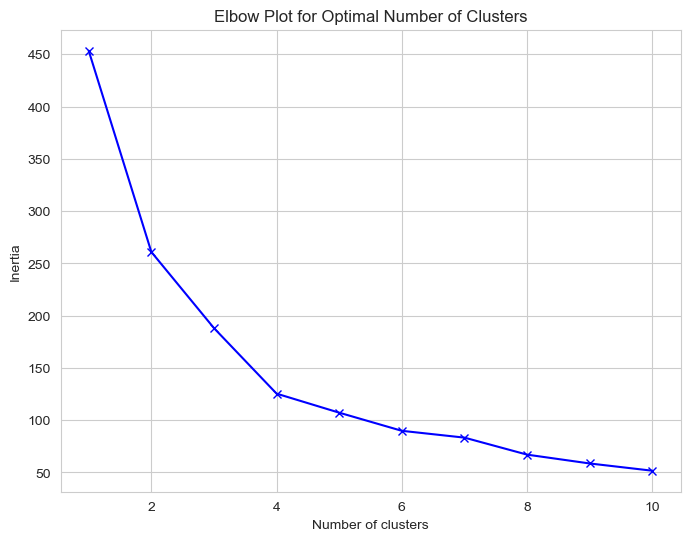

In [137]:
# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

In [132]:
component_features.head()

,Max,Min,Mean,STD,Cluster,FIT101_x,LIT101_x,MV101_x,P101_x,AIT201_x,AIT202_x,AIT203_x,FIT201_x,MV201_x,P203_x,P205_x,DPIT301_x,FIT301_x,LIT301_x,MV301_x,MV302_x,MV303_x,MV304_x,P301_x,P302_x,AIT401_x,AIT402_x,FIT401_x,LIT401_x,P402_x,UV401_x,AIT501_x,AIT502_x,AIT503_x,AIT504_x,FIT501_x,FIT502_x,FIT503_x,FIT504_x,P501_x,PIT501_x,PIT502_x,PIT503_x,FIT601_x,P602_x,FIT101_y,LIT101_y,MV101_y,P101_y,AIT201_y,AIT202_y,AIT203_y,FIT201_y,MV201_y,P203_y,P205_y,DPIT301_y,FIT301_y,LIT301_y,MV301_y,MV302_y,MV303_y,MV304_y,P301_y,P302_y,AIT401_y,AIT402_y,FIT401_y,LIT401_y,P402_y,UV401_y,AIT501_y,AIT502_y,AIT503_y,AIT504_y,FIT501_y,FIT502_y,FIT503_y,FIT504_y,P501_y,PIT501_y,PIT502_y,PIT503_y,FIT601_y,P602_y
FIT101,2.682862,0.00000,1.850517,1.130677,0,1.0000,-0.4880,0.7740,0.1751,-0.0131,-0.1574,0.0006,-0.0134,0.1766,0.1814,0.1311,-0.1721,-0.1026,0.3733,0.0123,-0.1468,0.0457,0.0117,0.0322,-0.1728,-0.0095,0.0603,0.0479,0.4899,0.0122,0.0124,-0.0050,0.0758,0.1009,0.0213,0.0485,0.0314,0.0003,-0.0653,0.0104,0.0362,0.0719,0.0383,-0.0048,0.0467,1.0000,-0.4880,0.7740,0.1751,-0.0131,-0.1574,0.0006,-0.0134,0.1766,0.1814,0.1311,-0.1721,-0.1026,0.3733,0.0123,-0.1468,0.0457,0.0117,0.0322,-0.1728,-0.0095,0.0603,0.0479,0.4899,0.0122,0.0124,-0.0050,0.0758,0.1009,0.0213,0.0485,0.0314,0.0003,-0.0653,0.0104,0.0362,0.0719,0.0383,-0.0048,0.0467
LIT101,817.281660,121.05551,587.532773,121.663778,1,-0.4880,1.0000,-0.6239,-0.6410,-0.0061,0.5272,-0.3624,-0.3890,-0.6422,-0.6471,-0.4798,-0.1270,-0.0678,0.1962,-0.0255,-0.1913,-0.0958,-0.0431,-0.1039,-0.1747,0.0019,-0.1206,0.0257,-0.3085,0.0939,0.0942,0.0753,-0.1471,-0.0059,0.0333,0.0256,0.0261,-0.0241,0.0120,0.0965,-0.0423,-0.0622,-0.0426,-0.0517,-0.0990,-0.4880,1.0000,-0.6239,-0.6410,-0.0061,0.5272,-0.3624,-0.3890,-0.6422,-0.6471,-0.4798,-0.1270,-0.0678,0.1962,-0.0255,-0.1913,-0.0958,-0.0431,-0.1039,-0.1747,0.0019,-0.1206,0.0257,-0.3085,0.0939,0.0942,0.0753,-0.1471,-0.0059,0.0333,0.0256,0.0261,-0.0241,0.0120,0.0965,-0.0423,-0.0622,-0.0426,-0.0517,-0.0990
MV101,2.000000,0.10000,1.720564,0.453235,0,0.7740,-0.6239,1.0000,0.2350,-0.0118,-0.2067,0.0069,-0.0064,0.2369,0.2432,0.1790,-0.2015,-0.1159,0.4624,0.0159,-0.1704,0.0610,0.0218,0.0375,-0.2023,-0.0109,0.0709,0.0643,0.6307,0.0170,0.0168,-0.0007,0.0910,0.1285,0.0291,0.0650,0.0436,-0.0037,-0.0886,0.0148,0.0448,0.0819,0.0469,-0.0136,0.0612,0.7740,-0.6239,1.0000,0.2350,-0.0118,-0.2067,0.0069,-0.0064,0.2369,0.2432,0.1790,-0.2015,-0.1159,0.4624,0.0159,-0.1704,0.0610,0.0218,0.0375,-0.2023,-0.0109,0.0709,0.0643,0.6307,0.0170,0.0168,-0.0007,0.0910,0.1285,0.0291,0.0650,0.0436,-0.0037,-0.0886,0.0148,0.0448,0.0819,0.0469,-0.0136,0.0612
P101,2.000000,1.00000,1.749149,0.432605,0,0.1751,-0.6410,0.2350,1.0000,-0.0069,-0.6847,0.5628,0.7571,0.9961,0.9953,0.8097,0.3377,0.2419,-0.4275,0.0135,0.5090,0.0450,-0.0005,0.0352,0.4969,0.0380,0.0731,0.0440,0.3479,0.0438,0.0434,-0.0399,0.0855,0.0161,0.0022,0.0438,0.0318,-0.0075,-0.0483,0.0410,0.0175,0.0617,0.0184,-0.0166,0.0531,0.1751,-0.6410,0.2350,1.0000,-0.0069,-0.6847,0.5628,0.7571,0.9961,0.9953,0.8097,0.3377,0.2419,-0.4275,0.0135,0.5090,0.0450,-0.0005,0.0352,0.4969,0.0380,0.0731,0.0440,0.3479,0.0438,0.0434,-0.0399,0.0855,0.0161,0.0022,0.0438,0.0318,-0.0075,-0.0483,0.0410,0.0175,0.0617,0.0184,-0.0166,0.0531
AIT201,271.930280,251.75594,263.783544,4.786958,2,-0.0131,-0.0061,-0.0118,-0.0069,1.0000,0.0405,-0.3498,0.1076,-0.0091,-0.0081,0.1486,0.2447,0.1576,0.0199,0.0012,0.0061,0.0043,0.0035,-0.0028,0.0079,0.2537,-0.3927,0.0839,0.0109,0.0683,0.0682,0.7502,-0.3887,0.6171,0.2676,0.0886,0.0822,-0.0975,-0.1332,0.0672,-0.0811,-0.0911,-0.0954,-0.2011,-0.0012,-0.0131,-0.0061,-0.0118,-0.0069,1.0000,0.0405,-0.3498,0.1076,-0.0091,-0.0081,0.1486,0.2447,0.1576,0.0199,0.0012,0.0061,0.0043,0.0035,-0.0028,0.0079,0.2537,-0.3927,0.0839,0.0109,0.0683,0.0682,0.7502,-0.3887,0.6171,0.2676,0.0886,0.0822,-0.0975,-0.1332,0.0672,-0.0811,-0.0911,-0.0954,-0.2011,-0.0012


In [72]:
component_features.to_csv('D:\GitHub\MSc-Project-March\kmeans_componennt_clusters.csv', index=True)

In [120]:
non_lin_correlation_matrix = pd.read_csv(r'D:\GitHub\MSc-Project-March\non_lin_cor_matrix.csv')
non_lin_correlation_matrix = non_lin_correlation_matrix.set_index('Unnamed: 0')

In [121]:
non_lin_correlation_matrix.head()

,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P203,P205,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P402,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FIT101,1.0000,-0.4880,0.7740,0.1751,-0.0131,-0.1574,0.0006,-0.0134,0.1766,0.1814,0.1311,-0.1721,-0.1026,0.3733,0.0123,-0.1468,0.0457,0.0117,0.0322,-0.1728,-0.0095,0.0603,0.0479,0.4899,0.0122,0.0124,-0.0050,0.0758,0.1009,0.0213,0.0485,0.0314,0.0003,-0.0653,0.0104,0.0362,0.0719,0.0383,-0.0048,0.0467
LIT101,-0.4880,1.0000,-0.6239,-0.6410,-0.0061,0.5272,-0.3624,-0.3890,-0.6422,-0.6471,-0.4798,-0.1270,-0.0678,0.1962,-0.0255,-0.1913,-0.0958,-0.0431,-0.1039,-0.1747,0.0019,-0.1206,0.0257,-0.3085,0.0939,0.0942,0.0753,-0.1471,-0.0059,0.0333,0.0256,0.0261,-0.0241,0.0120,0.0965,-0.0423,-0.0622,-0.0426,-0.0517,-0.0990
MV101,0.7740,-0.6239,1.0000,0.2350,-0.0118,-0.2067,0.0069,-0.0064,0.2369,0.2432,0.1790,-0.2015,-0.1159,0.4624,0.0159,-0.1704,0.0610,0.0218,0.0375,-0.2023,-0.0109,0.0709,0.0643,0.6307,0.0170,0.0168,-0.0007,0.0910,0.1285,0.0291,0.0650,0.0436,-0.0037,-0.0886,0.0148,0.0448,0.0819,0.0469,-0.0136,0.0612
P101,0.1751,-0.6410,0.2350,1.0000,-0.0069,-0.6847,0.5628,0.7571,0.9961,0.9953,0.8097,0.3377,0.2419,-0.4275,0.0135,0.5090,0.0450,-0.0005,0.0352,0.4969,0.0380,0.0731,0.0440,0.3479,0.0438,0.0434,-0.0399,0.0855,0.0161,0.0022,0.0438,0.0318,-0.0075,-0.0483,0.0410,0.0175,0.0617,0.0184,-0.0166,0.0531
AIT201,-0.0131,-0.0061,-0.0118,-0.0069,1.0000,0.0405,-0.3498,0.1076,-0.0091,-0.0081,0.1486,0.2447,0.1576,0.0199,0.0012,0.0061,0.0043,0.0035,-0.0028,0.0079,0.2537,-0.3927,0.0839,0.0109,0.0683,0.0682,0.7502,-0.3887,0.6171,0.2676,0.0886,0.0822,-0.0975,-0.1332,0.0672,-0.0811,-0.0911,-0.0954,-0.2011,-0.0012


In [126]:
component_features = pd.merge(component_features, non_lin_correlation_matrix, how = 'left', left_index=True, right_index=True)
component_features = component_features.drop(columns=['PCA1','PCA2'])

In [133]:
component_features = component_features.drop(columns=['Max','Min','STD','Mean'])

In [138]:
K = 7
kmeans = KMeans(n_clusters=K, random_state=44)
component_features['Cluster'] = kmeans.fit_predict(component_features)
# Group by cluster and store component names in a dictionary
clusters = {}
for cluster in range(K):
    clusters[f'Cluster {cluster}'] = component_features[component_features['Cluster'] == cluster].index.tolist()

# Display the grouped components by cluster
for cluster, components in clusters.items():
    print(f'{cluster}: {components}')

C:\Users\loz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\loz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: ['AIT203', 'AIT402', 'AIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT503', 'FIT601']
Cluster 1: ['P101', 'FIT201', 'MV201', 'P203', 'P205', 'DPIT301', 'FIT301', 'MV302', 'P302']
Cluster 2: ['MV301', 'MV303', 'MV304', 'P301', 'AIT503', 'P602']
Cluster 3: ['FIT401', 'AIT501', 'AIT504', 'FIT501', 'FIT502']
Cluster 4: ['LIT101', 'AIT202', 'LIT301']
Cluster 5: ['FIT101', 'MV101', 'LIT401']
Cluster 6: ['AIT201', 'AIT401', 'P402', 'UV401', 'P501', 'PIT502']


In [135]:
# Group by cluster and show component names
grouped_corr = component_features.groupby('Cluster').apply(lambda x: list(x.index)).reset_index()
grouped_corr.columns = ['Cluster', 'Components']

# Display the grouped DataFrame
print(grouped_corr)

   Cluster                                         Components
0        0                   [LIT301, AIT401, LIT401, AIT504]
1        1  [FIT101, LIT101, MV101, AIT201, AIT202, MV301,...
2        2  [P101, FIT201, MV201, P203, P205, DPIT301, FIT...
3        3                   [FIT401, AIT501, FIT501, FIT502]
4        4                           [AIT203, PIT501, PIT503]
5        5           [AIT402, AIT502, FIT503, FIT504, FIT601]


In [129]:
print(grouped)

### Fairly effective considering......

## DBSCAN

In [111]:
#drop pca
df_for_cluster = component_features.drop(columns=['PCA1','PCA2','Cluster'])


In [113]:
scaler = MinMaxScaler()

In [114]:
scaled_df_for_cluster = pd.DataFrame(scaler.fit_transform(df_for_cluster), columns=df_for_cluster.columns)
scaled_df_for_cluster

,Max,Min,Mean,STD
0,0.002335,0.000000,0.002040,0.009152
1,0.805677,0.387652,0.652886,1.000000
2,0.001661,0.000320,0.001896,0.003583
3,0.001661,0.003202,0.001928,0.003413
4,0.267862,0.806189,0.293116,0.039208
5,0.008552,0.026450,0.009305,0.000598
6,0.559183,1.000000,0.387124,0.406361
7,0.002141,0.000000,0.002022,0.008556
8,0.001661,0.000640,0.001925,0.003465
9,0.001661,0.003202,0.001926,0.003422


In [115]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust `eps` and `min_samples` as needed
component_features['Cluster'] = dbscan.fit_predict(scaled_df_for_cluster)

In [116]:
component_features['Cluster'].value_counts()

 0    36
 1     3
-1     1
Name: Cluster, dtype: int64

In [108]:
grouped = component_features.groupby('Cluster')

In [109]:
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    print(group)
    print("\n")

Cluster -1:
                 Max         Min        Mean         STD  Cluster  \
LIT101    817.281660  121.055510  587.532773  121.663778       -1   
AIT201    271.930280  251.755940  263.783544    4.786958       -1   
AIT202      8.987344    8.259677    8.388162    0.090164       -1   
AIT203    567.334050  312.278900  348.379334   49.449694       -1   
DPIT301    21.055124    0.022409   16.604740    6.719335       -1   
FIT301      2.345732    0.000000    1.837282    0.818665       -1   
LIT301   1014.327300  133.018770  899.892946   93.911550       -1   
AIT401    148.825280    0.000000  124.717129   54.808589       -1   
AIT402    235.660130  153.878490  171.287752   12.916114       -1   
LIT401   1003.519500  130.816470  882.836933   87.870639       -1   
AIT501      7.923161    7.411433    7.872306    0.042775       -1   
AIT502    218.264540  142.348100  159.282508   13.411618       -1   
AIT503    283.247880  252.178900  266.890181    5.218061       -1   
AIT504    223.715710  

# Calculate cosine similarity

In [75]:
# Compute cosine similarity between the components
cosine_sim = cosine_similarity(component_features)

# Create a DataFrame to display the similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=component_features.index, columns=component_features.index)

# Display the cosine similarity matrix
print("Cosine Similarity Matrix:")
print(cosine_sim_df)

Cosine Similarity Matrix:
           FIT101    LIT101     MV101      P101    AIT201    AIT202    AIT203  \
FIT101   1.000000  0.970196  0.980644  0.917743  0.779399  0.777713  0.874189   
LIT101   0.970196  1.000000  0.991764  0.967158  0.878997  0.878413  0.946333   
MV101    0.980644  0.991764  1.000000  0.949691  0.841198  0.838662  0.905480   
P101     0.917743  0.967158  0.949691  1.000000  0.963824  0.962685  0.981655   
AIT201   0.779399  0.878997  0.841198  0.963824  1.000000  0.999839  0.969451   
AIT202   0.777713  0.878413  0.838662  0.962685  0.999839  1.000000  0.971486   
AIT203   0.874189  0.946333  0.905480  0.981655  0.969451  0.971486  1.000000   
FIT201   0.999544  0.971134  0.983955  0.921108  0.784170  0.782013  0.873242   
MV201    0.976820  0.993733  0.999275  0.960637  0.861012  0.858545  0.918682   
P203     0.917831  0.967157  0.949658  1.000000  0.963776  0.962645  0.981707   
P205     0.920695  0.966787  0.947662  0.999562  0.961738  0.960938  0.983976   
DP

In [76]:
# Extract the upper triangle of the similarity matrix without the diagonal
cosine_sim_df.values[np.tril_indices_from(cosine_sim_df, k=0)] = np.nan

In [77]:
cosine_sim_df

,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P203,P205,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P402,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
FIT101,NaN,0.970196,0.980644,0.917743,0.779399,0.777713,0.874189,0.999544,0.976820,0.917831,0.920695,0.994221,0.996163,0.953601,0.944513,0.972599,0.957065,0.958403,0.861983,0.913324,0.993979,0.847319,0.943126,0.953169,0.881916,0.881918,0.775768,0.849125,0.787368,0.813927,0.943122,0.945334,0.943871,0.943615,0.882064,0.944369,0.933360,0.944822,0.806622,0.865282
LIT101,NaN,NaN,0.991764,0.967158,0.878997,0.878413,0.946333,0.971134,0.993733,0.967157,0.966787,0.984320,0.981309,0.993354,0.984271,0.992659,0.980396,0.985329,0.939744,0.966898,0.978184,0.930958,0.978531,0.993575,0.958788,0.958789,0.876967,0.931705,0.885790,0.836661,0.978593,0.980577,0.979433,0.978807,0.958838,0.982779,0.955799,0.981461,0.812259,0.940982
MV101,NaN,NaN,NaN,0.949691,0.841198,0.838662,0.905480,0.983955,0.999275,0.949658,0.947662,0.995625,0.993503,0.993004,0.961133,0.998886,0.966396,0.968302,0.891329,0.950449,0.993418,0.891308,0.988705,0.992713,0.941275,0.941276,0.839704,0.892517,0.847822,0.785319,0.988724,0.989534,0.989043,0.988911,0.941345,0.989778,0.931586,0.989587,0.763355,0.893227
P101,NaN,NaN,NaN,NaN,0.963824,0.962685,0.981655,0.921108,0.960637,1.000000,0.999562,0.933219,0.930768,0.962878,0.928586,0.960240,0.905480,0.921100,0.963175,0.999590,0.930873,0.982571,0.928950,0.962540,0.989052,0.989053,0.962393,0.983354,0.966922,0.743330,0.929142,0.929817,0.929722,0.929126,0.989117,0.937485,0.872022,0.933195,0.711554,0.964759
AIT201,NaN,NaN,NaN,NaN,NaN,0.999839,0.969451,0.784170,0.861012,0.963776,0.961738,0.806614,0.801360,0.880693,0.840385,0.862866,0.794795,0.818597,0.951005,0.965709,0.802105,0.987166,0.832600,0.880598,0.969671,0.969671,0.999913,0.987107,0.999859,0.646261,0.832906,0.832897,0.833475,0.832583,0.969671,0.845788,0.761236,0.838669,0.601354,0.951172
AIT202,NaN,NaN,NaN,NaN,NaN,NaN,0.971486,0.782013,0.858545,0.962645,0.960938,0.804294,0.798998,0.878588,0.842566,0.860207,0.796379,0.820303,0.954458,0.964323,0.799093,0.988375,0.829443,0.878573,0.968023,0.968023,0.999642,0.988261,0.999831,0.654452,0.829751,0.829963,0.830406,0.829443,0.968021,0.842889,0.764737,0.835689,0.609869,0.954554
AIT203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873242,0.918682,0.981707,0.983976,0.886862,0.883167,0.929050,0.936127,0.917012,0.902968,0.920991,0.995882,0.979541,0.878072,0.996076,0.882889,0.929604,0.970748,0.970748,0.967066,0.996125,0.973308,0.809329,0.883119,0.885840,0.884542,0.883191,0.970780,0.895409,0.888414,0.890036,0.776543,0.996369
FIT201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980367,0.921179,0.923283,0.995961,0.997709,0.957771,0.941072,0.976663,0.953680,0.955046,0.858854,0.917354,0.996442,0.848553,0.948852,0.957230,0.887693,0.887695,0.780862,0.850392,0.791813,0.798880,0.948849,0.950652,0.949449,0.949297,0.887838,0.949713,0.926558,0.950166,0.790237,0.862163
MV201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.960603,0.958544,0.992787,0.990476,0.995250,0.961415,0.999781,0.963249,0.966749,0.903668,0.961495,0.990581,0.906805,0.987911,0.994944,0.952988,0.952989,0.859620,0.907957,0.867183,0.781122,0.987951,0.988659,0.988270,0.988101,0.953055,0.989791,0.927727,0.989112,0.757359,0.905497
P203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999582,0.933237,0.930798,0.962800,0.928626,0.960191,0.905519,0.921147,0.963246,0.999570,0.930890,0.982581,0.928823,0.962462,0.988959,0.988960,0.962337,0.983366,0.966879,0.743562,0.929014,0.929697,0.929598,0.929000,0.989024,0.937367,0.872116,0.933075,0.711826,0.964833


In [78]:
# Melt the DataFrame to long format and sort by similarity
cosine_sim_long = cosine_sim_df.stack().reset_index()
cosine_sim_long.columns = ['Component 1', 'Component 2', 'Cosine Similarity']
cosine_sim_long = cosine_sim_long.sort_values(by='Cosine Similarity', ascending=False).reset_index(drop=True)

In [79]:
cosine_sim_long.loc[cosine_sim_long['Component 1'] == 'FIT501',:]

,Component 1,Component 2,Cosine Similarity
6,FIT501,FIT504,0.999998
9,FIT501,FIT503,0.999987
17,FIT501,FIT502,0.999904
27,FIT501,PIT503,0.999697
39,FIT501,PIT501,0.999538
386,FIT501,P501,0.942707
498,FIT501,PIT502,0.913529
608,FIT501,P602,0.870871
760,FIT501,FIT601,0.721348


In [80]:
type(cosine_sim_long)

pandas.core.frame.DataFrame

# Dimesionality Reduction

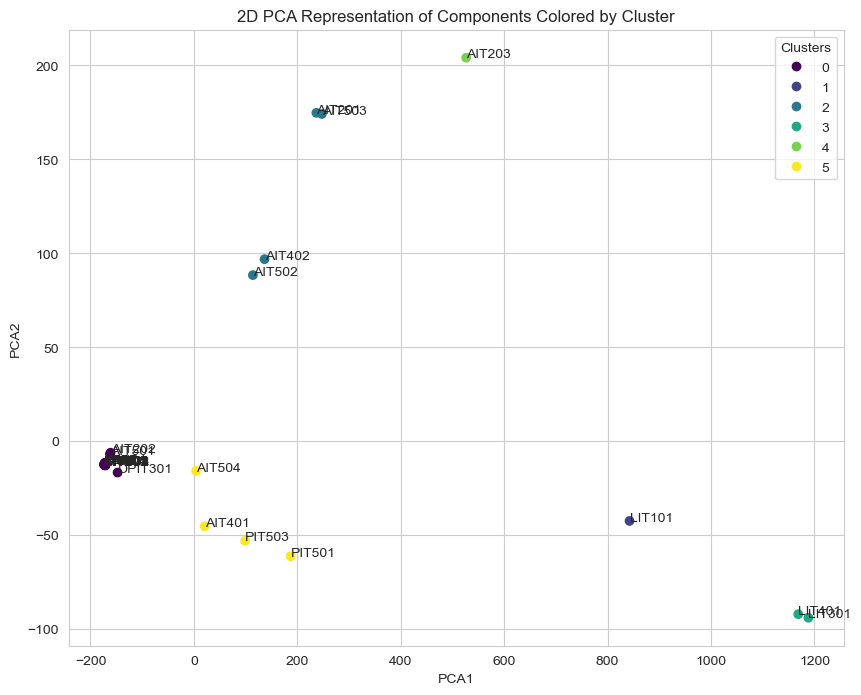

In [81]:
# Perform PCA for 2-dimensional representation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(component_features.drop('Cluster', axis=1))

# Add PCA results to the DataFrame
component_features['PCA1'] = pca_result[:, 0]
component_features['PCA2'] = pca_result[:, 1]

# Plot the 2-dimensional representation
plt.figure(figsize=(10, 8))
scatter = plt.scatter(component_features['PCA1'], component_features['PCA2'],
                      c=component_features['Cluster'], cmap='viridis')
plt.title('2D PCA Representation of Components Colored by Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(*scatter.legend_elements(), title="Clusters")

# Add component names as labels
for i, component in component_features.iterrows():
    plt.text(component['PCA1'] + 0.02, component['PCA2'], i)

plt.show()